In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('sonar.csv')

In [3]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


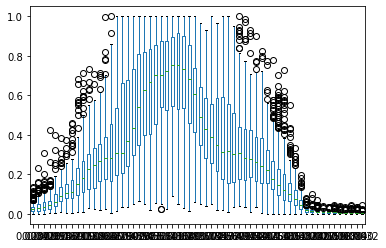

In [5]:
df.plot.box()

In [6]:
from scipy.stats import zscore

In [7]:
z=np.abs(zscore(df.iloc[:,0:-1]))

In [8]:
z_data=df[(z<3).all(axis=1)]

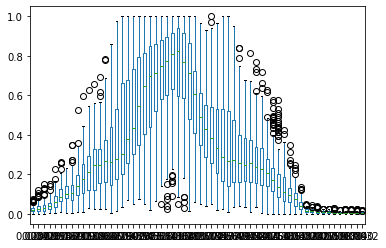

In [9]:
z_data.plot.box()

In [10]:
z_data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R


In [11]:
z_data.tail()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
206,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [12]:
z_data.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,...,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.023539,0.030249,0.035130,0.043885,0.066469,0.095884,0.110231,0.115414,0.154493,0.185708,...,0.013769,0.011560,0.009402,0.009550,0.007997,0.007201,0.006822,0.006315,0.006595,0.005682
std,0.014091,0.021583,0.025917,0.027578,0.041300,0.049782,0.047643,0.060414,0.083398,0.103696,...,0.008392,0.006976,0.005956,0.006042,0.005505,0.004195,0.004542,0.004392,0.004647,0.003628
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005700,0.011700,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013000,0.013850,0.016850,0.023650,0.035750,0.063300,0.078650,0.072750,0.094500,0.104050,...,0.007400,0.006600,0.004700,0.004750,0.003800,0.004150,0.003700,0.003250,0.003250,0.003000
50%,0.020900,0.026700,0.029100,0.039400,0.059600,0.084900,0.102300,0.107100,0.141900,0.176700,...,0.012900,0.009800,0.008000,0.008400,0.006800,0.006400,0.005600,0.005100,0.005600,0.005000
75%,0.030900,0.042050,0.047500,0.056750,0.089450,0.123700,0.139500,0.147850,0.196050,0.253000,...,0.018650,0.014950,0.012750,0.012950,0.010700,0.009650,0.009100,0.008850,0.008300,0.007600
max,0.076200,0.121000,0.152600,0.149800,0.225200,0.261100,0.230400,0.348100,0.527600,0.596500,...,0.042600,0.038600,0.026500,0.027100,0.029000,0.019800,0.024200,0.024400,0.024600,0.019800


In [13]:
z_data.isna().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
0.0986    0
0.1539    0
0.1601    0
0.3109    0
0.2111    0
0.1609    0
0.1582    0
0.2238    0
0.0645    0
0.0660    0
0.2273    0
0.3100    0
0.2999    0
0.5078    0
0.4797    0
0.5783    0
0.5071    0
0.4328    0
0.5550    0
0.6711    0
0.6415    0
0.7104    0
0.8080    0
0.6791    0
0.3857    0
         ..
0.2604    0
0.5121    0
0.7547    0
0.8537    0
0.8507    0
0.6692    0
0.6097    0
0.4943    0
0.2744    0
0.0510    0
0.2834    0
0.2825    0
0.4256    0
0.2641    0
0.1386    0
0.1051    0
0.1343    0
0.0383    0
0.0324    0
0.0232    0
0.0027    0
0.0065    0
0.0159    0
0.0072    0
0.0167    0
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [14]:
z_data.corr()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0.0200,1.000000,0.607726,0.495046,0.297068,0.240402,0.223621,0.192202,0.268678,0.230688,0.281563,...,0.092914,0.031215,0.101365,0.054306,0.183595,0.256583,0.267838,0.219018,0.272708,0.279437
0.0371,0.607726,1.000000,0.705319,0.425212,0.285885,0.272123,0.173574,0.214865,0.221120,0.267240,...,0.184902,0.182276,0.248327,0.238442,0.333958,0.313979,0.289902,0.273239,0.286095,0.327445
0.0428,0.495046,0.705319,1.000000,0.591934,0.363063,0.254846,0.133049,0.284024,0.274714,0.293548,...,0.169845,0.235795,0.255497,0.201870,0.231122,0.351721,0.391939,0.240864,0.299066,0.322239
0.0207,0.297068,0.425212,0.591934,1.000000,0.581850,0.302753,0.227237,0.309301,0.164799,0.188778,...,0.150916,0.248531,0.258288,0.164034,0.113364,0.340695,0.276367,0.281171,0.370891,0.276731
0.0954,0.240402,0.285885,0.363063,0.581850,1.000000,0.607442,0.300607,0.236474,0.209499,0.252251,...,0.175729,0.267940,0.294085,0.129024,0.098190,0.128308,0.053986,0.146179,0.208864,0.134570
0.0986,0.223621,0.272123,0.254846,0.302753,0.607442,1.000000,0.685855,0.463311,0.330339,0.342488,...,0.165911,0.175319,0.149464,0.164159,0.100652,0.146010,0.106894,0.145645,0.163679,0.167815
0.1539,0.192202,0.173574,0.133049,0.227237,0.300607,0.685855,1.000000,0.645909,0.389150,0.328369,...,0.172578,0.118235,-0.026832,0.157682,0.098504,0.122805,0.087868,0.088440,0.179400,0.177543
0.1601,0.268678,0.214865,0.284024,0.309301,0.236474,0.463311,0.645909,1.000000,0.720632,0.581316,...,0.235795,0.137328,-0.032194,0.103867,0.098859,0.126152,0.194257,0.166702,0.176026,0.176828
0.3109,0.230688,0.221120,0.274714,0.164799,0.209499,0.330339,0.389150,0.720632,1.000000,0.856516,...,0.211195,0.140785,-0.102832,0.057586,-0.001382,0.006236,-0.027193,0.081249,0.008188,0.019707
0.2111,0.281563,0.267240,0.293548,0.188778,0.252251,0.342488,0.328369,0.581316,0.856516,1.000000,...,0.275655,0.209926,-0.072910,0.029669,0.015137,-0.000146,-0.035230,0.075310,0.066506,0.097577


In [15]:
rocks=z_data.R=='R'

In [16]:
rocks_d=z_data[rocks]

In [17]:
mines=z_data.R=='M'

In [18]:
mines_d=z_data[mines]

In [19]:
columns=[rocks_d.columns]

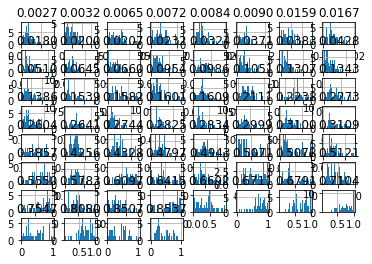

In [20]:
for m in columns:
    hist=rocks_d[m].hist(bins=50)
    
   
    

In [21]:
plt.rcParams['figure.figsize']=(20,30)

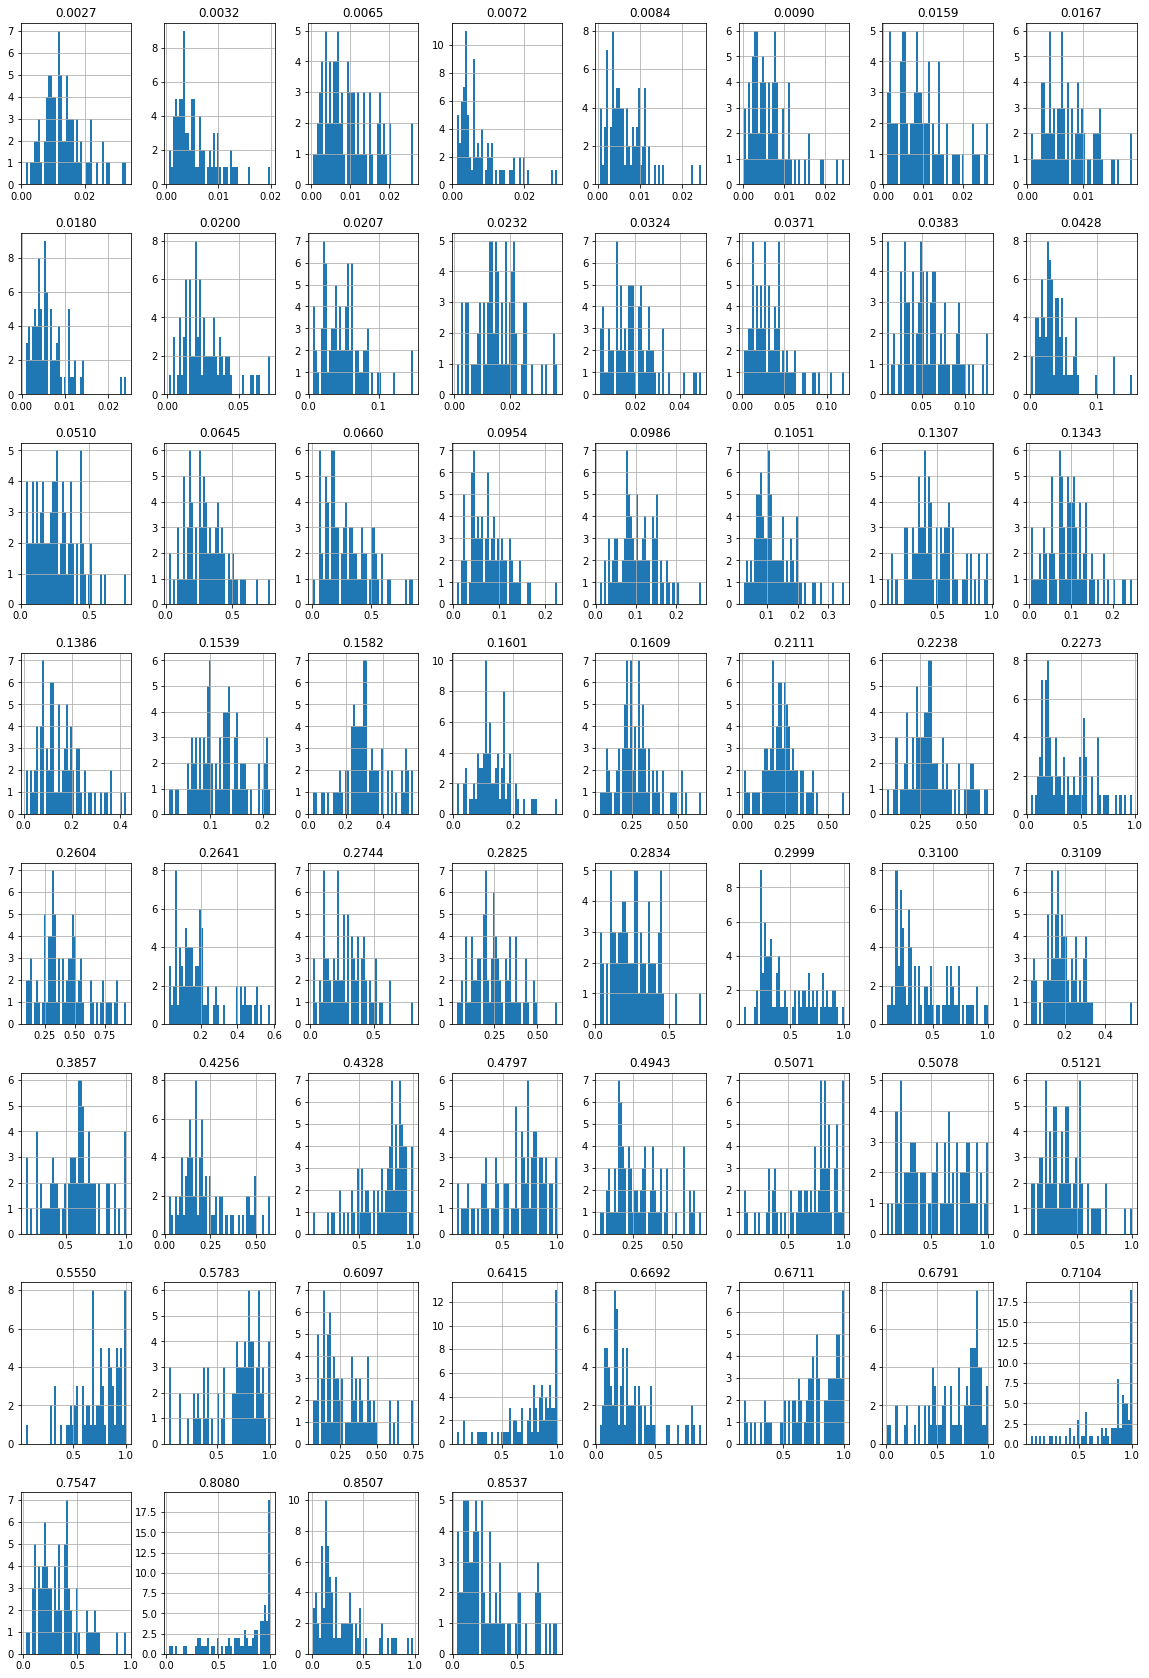

In [22]:
h=mines_d.hist(bins=50)

In [23]:
z_data.shape

(167, 61)

In [24]:
df.shape

(207, 61)

In [25]:
x=z_data.iloc[:,0:-1]

In [26]:
x.shape

(167, 60)

In [27]:
y=z_data.iloc[:,-1]

In [28]:
y.shape

(167,)

In [29]:
y=y.values.reshape(-1,1)

In [30]:
t=df.iloc[:,0:-1]

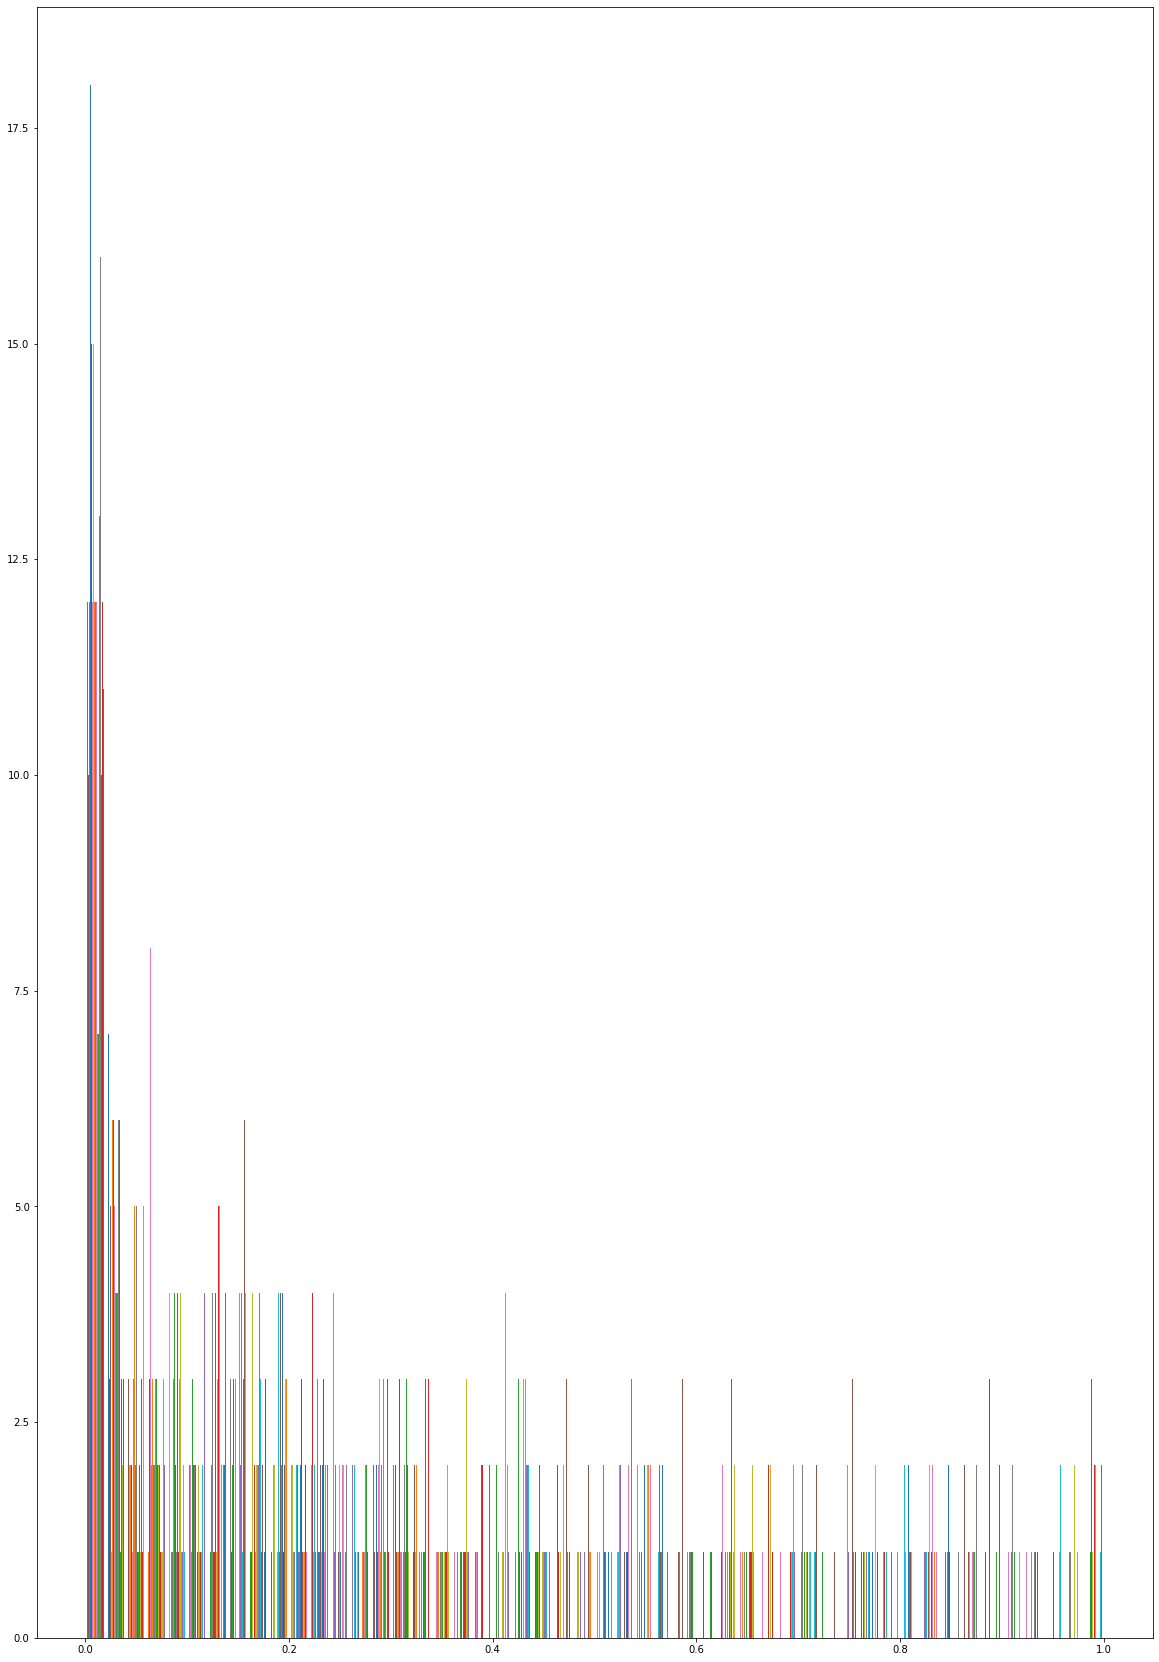

In [31]:
histogram_untrimmed_data=plt.hist(t,bins=50)

In [32]:
null_values=df.isna().sum()

In [33]:
corr=df.corr()

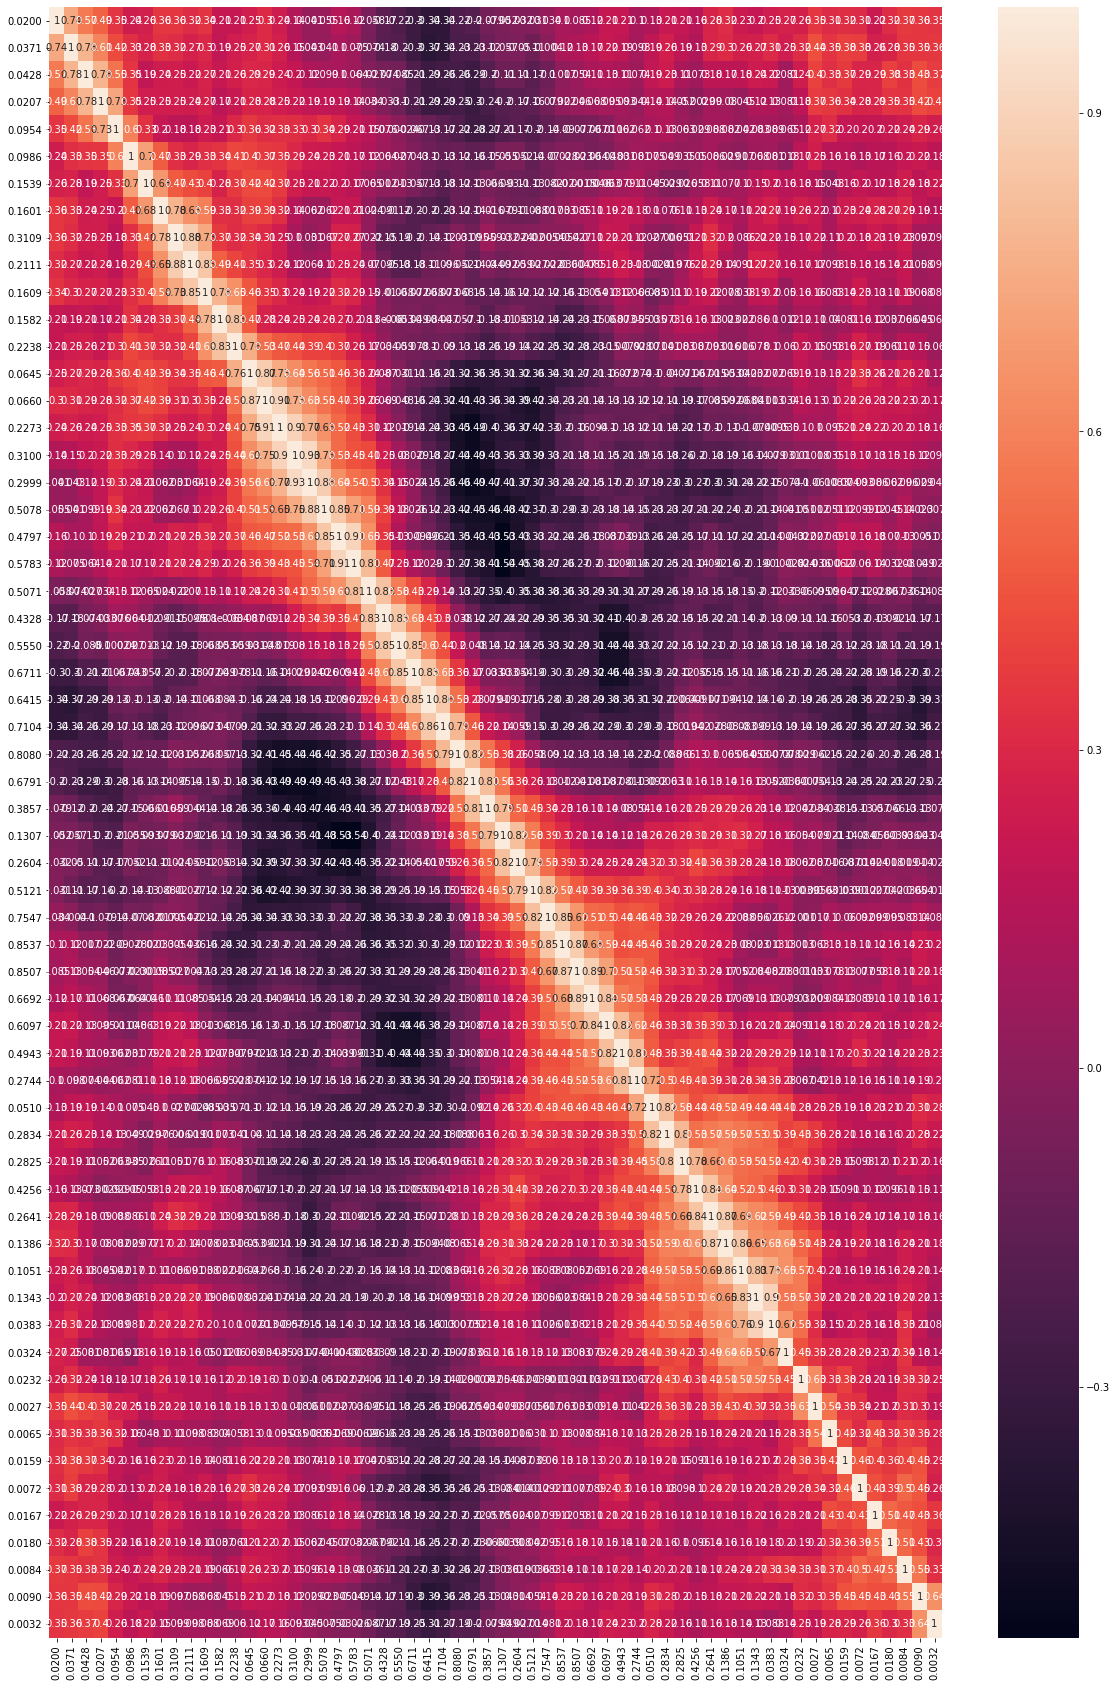

In [34]:
sns.heatmap(corr,annot=True)

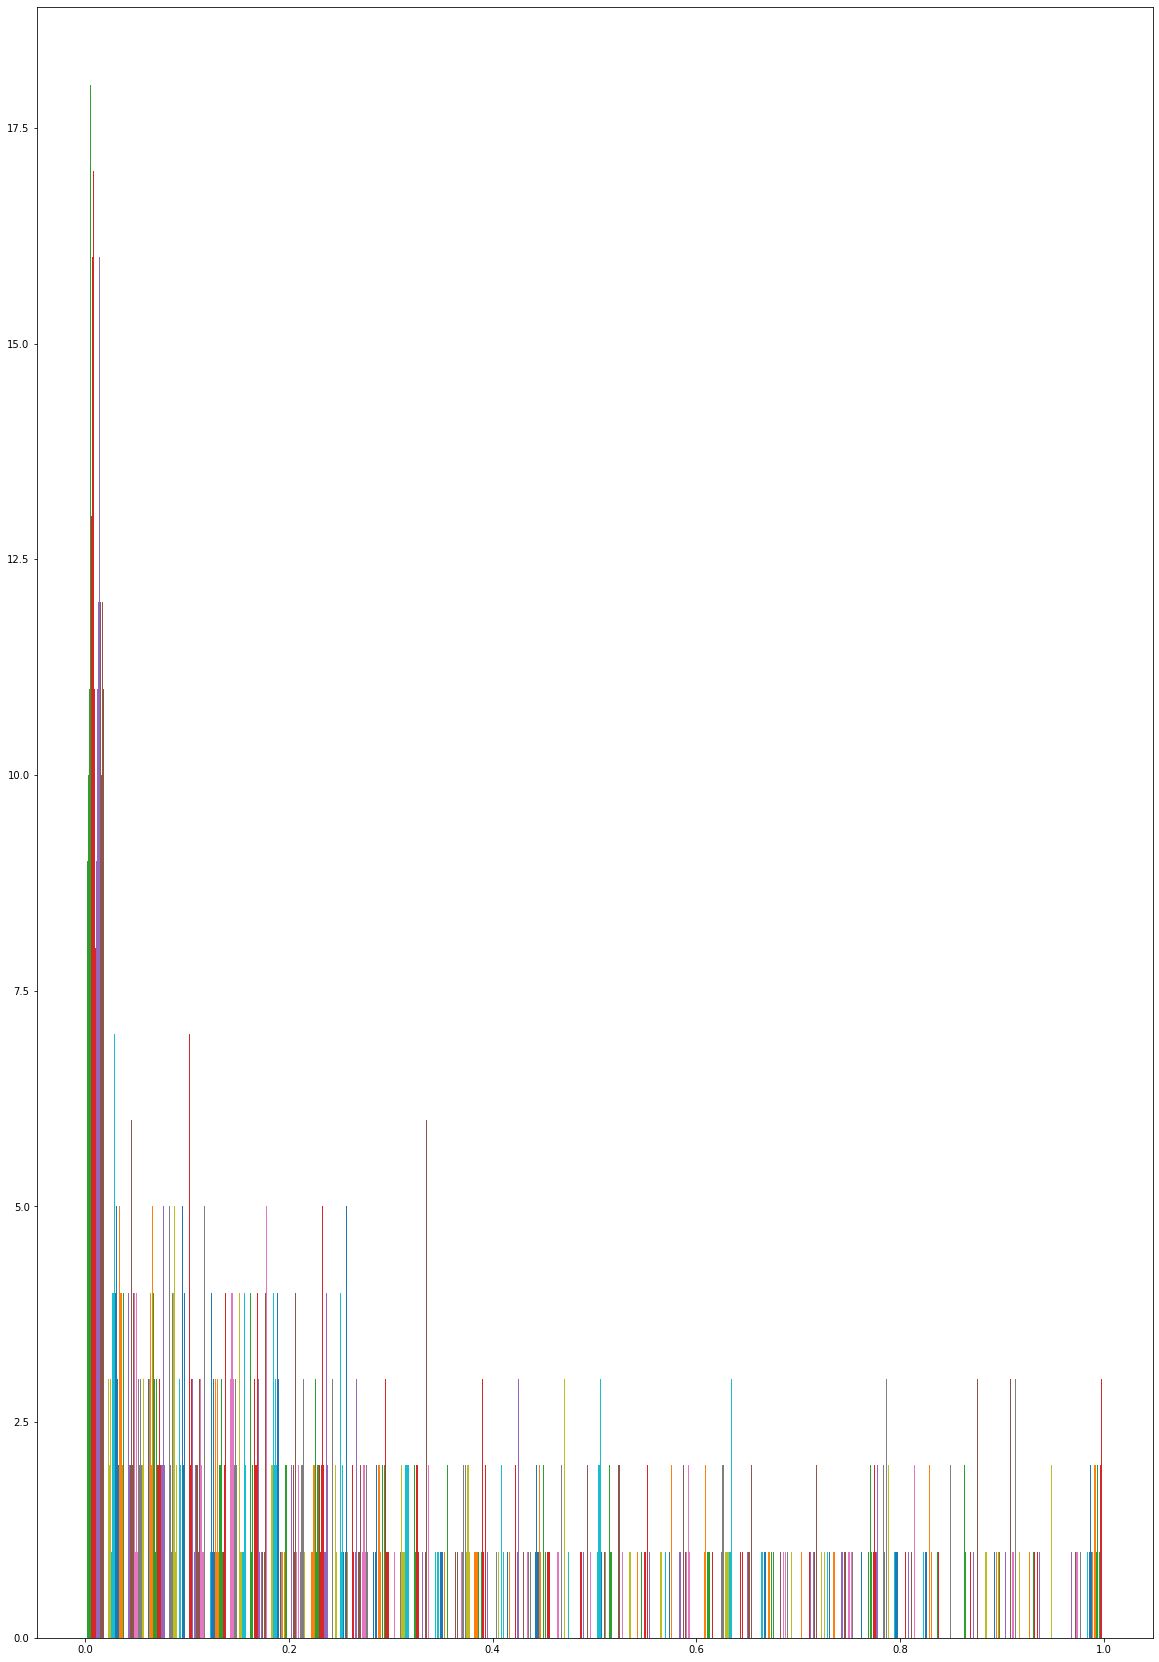

In [35]:
histogram=plt.hist(x,bins=50)

In [36]:
z_data.skew()

0.0200    1.252721
0.0371    1.308041
0.0428    1.653128
0.0207    1.229816
0.0954    0.933829
0.0986    0.861935
0.1539    0.359981
0.1601    0.958050
0.3109    0.978246
0.2111    0.765877
0.1609    0.750024
0.1582    0.467539
0.2238    0.684199
0.0645    0.724465
0.0660    0.712687
0.2273    0.774311
0.3100    0.667602
0.2999    0.540145
0.5078    0.251274
0.4797   -0.087221
0.5783   -0.282408
0.5071   -0.512045
0.4328   -0.648564
0.5550   -0.687917
0.6711   -1.063760
0.6415   -1.052846
0.7104   -0.955804
0.8080   -0.854401
0.6791   -0.573876
0.3857   -0.140695
0.1307    0.264920
0.2604    0.335955
0.5121    0.555980
0.7547    0.706041
0.8537    0.817889
0.8507    0.807913
0.6692    0.829148
0.6097    0.917935
0.4943    0.696745
0.2744    0.716703
0.0510    0.926007
0.2834    0.687845
0.2825    0.683889
0.4256    1.250835
0.2641    1.490031
0.1386    0.990820
0.1051    1.123128
0.1343    0.893793
0.0383    0.923176
0.0324    0.936314
0.0232    0.783265
0.0027    1.258402
0.0065    0.

In [37]:
x=z_data.iloc[:,0:-1]

In [38]:
x.shape

(167, 60)

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca=PCA(n_components=52)

In [41]:
x=pca.fit_transform(x)

In [48]:
lm=LogisticRegression()

In [49]:
list=np.arange(0,100)

In [50]:
for m in list:
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=30,random_state=m)
    pred_r=lm.predict(xtest)
    print(accuracy_score(pred_r,ytest))

NotFittedError: This LogisticRegression instance is not fitted yet

In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=30,random_state=42)

In [52]:
lm=LogisticRegression()

In [53]:
lm.fit(xtrain,ytrain)

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
pred=lm.predict(xtest)

In [55]:
accuracy_score(pred,ytest)

0.9666666666666667

In [56]:
c=confusion_matrix(pred,ytest)

In [57]:
c

array([[11,  1],
       [ 0, 18]], dtype=int64)

In [58]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           M       1.00      0.92      0.96        12
           R       0.95      1.00      0.97        18

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [60]:
models=[GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),SVC()]

In [61]:
for m in models:
    m.fit(xtrain,ytrain)
    predm=m.predict(xtest)
    print('accuracy score of', m, 'is:')
    print(accuracy_score(predm,ytest))
    print(confusion_matrix(predm,ytest))
    print(classification_report(predm,ytest))

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
0.5333333333333333
[[ 5  8]
 [ 6 11]]
              precision    recall  f1-score   support

           M       0.45      0.38      0.42        13
           R       0.58      0.65      0.61        17

    accuracy                           0.53        30
   macro avg       0.52      0.52      0.51        30
weighted avg       0.53      0.53      0.53        30

accuracy score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') is:
0.6666666666666666
[[ 9  8]
 [ 2 11]]
              precision    recall  f1-score   support

           M       0.82      0.53      0.64     

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\utkarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Us